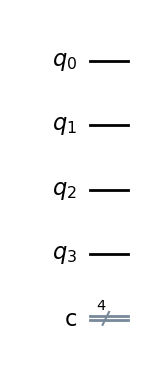

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
import matplotlib as mpl
import numpy as np
from math import pi

#which statement will create a quantum circuit with four quantum bits and four classical bits?
qc = QuantumCircuit(4, 4)
qc.draw(output = 'mpl')

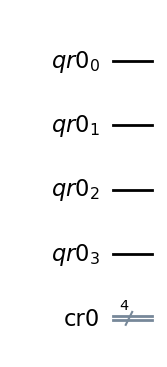

In [4]:
#repeat the same, but now put the quantum and classical bits in separate registers
qc_1 = QuantumCircuit(QuantumRegister(4, 'qr0'), ClassicalRegister(4, 'cr0'))
qc_1.draw(output = 'mpl')

code for Aer circuit simulator

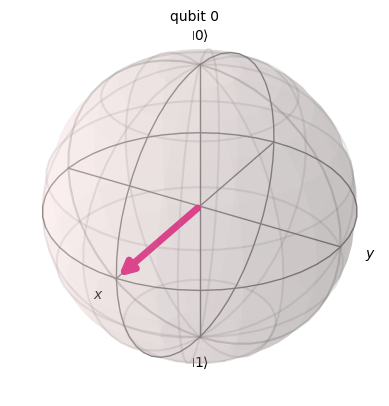

In [5]:
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_aer import Aer

qc_offstate = QuantumCircuit(1)                                             #create circuit
qc_offstate.h(0)
simulator = Aer.get_backend('statevector_simulator')                        #initialize simulator
job_statevector = transpile(qc_offstate, simulator)                         #transpile circuit (execute on simulator)
result_statevector = simulator.run(job_statevector).result()                #run circuit
outputstate = result_statevector.get_statevector(qc_offstate)               #get state vector from result of running the circuit
plot_bloch_multivector(outputstate)                                         #plot on bloch sphere

^^ the superpositioned |+> state visualized on the bloch sphere, coded in qiskit using a simulated backend

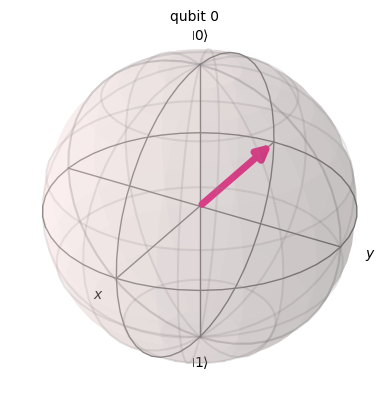

In [28]:
#code to solve the example problem provided on the slides
qc_offstate1 = QuantumCircuit(1)
qc_offstate1.h(0)
qc_offstate1.ry(pi, 0)

job_lecex = transpile(qc_offstate1, simulator)
result_lecex = simulator.run(job_lecex, shots=1000).result()
state_lecex = result_lecex.get_statevector()
plot_bloch_multivector(state_lecex)


It is trivial to see with the bloch sphere visualization that the probability of |0> in the resultant state would be 1/2 because of its location flat on the XY plane. The histogram confirms this observation. 

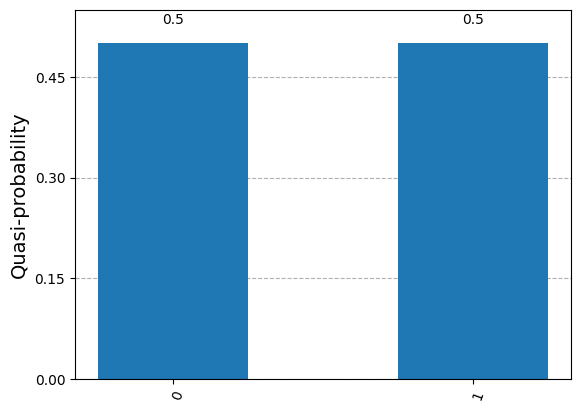

In [29]:
counts_lecex = result_lecex.get_counts(qc_offstate1)
plot_histogram(counts_lecex)

In [155]:
#create a bell state and measure
qc_bell = QuantumCircuit(2, 2)
qc_bell.h(0)
qc_bell.cx(0, 1)
#qc_bell.measure([0, 1], [0, 1])
#qc_bell.draw(output = 'mpl')

job_bell = transpile(qc_bell, simulator)
result_bell = simulator.run(job_bell, shots=1000).result()
output_bell = result_bell.get_statevector(qc_bell)
print(output_bell)

#histogram shit

#counts_bell = result_bell.get_counts(qc_bell)
#plot_histogram(counts_bell)


Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


C:\Users\carso\AppData\Local\Temp\ipykernel_15532\2468797550.py:15: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc_teleporter.z(2).c_if(0, 1)
C:\Users\carso\AppData\Local\Temp\ipykernel_15532\2468797550.py:16: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc_teleporter.x(2).c_if(1, 1)


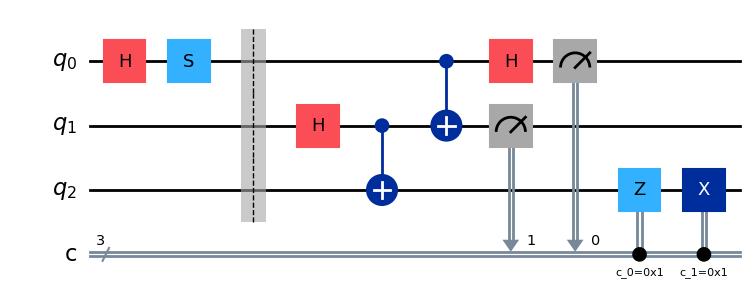

In [19]:
#code the quantum teleportation circuit

qc_teleporter = QuantumCircuit(3, 3)
#initial condition
qc_teleporter.h(0)
qc_teleporter.s(0)
qc_teleporter.barrier()
#create teleportation circuit to transfer information
qc_teleporter.h(1)
qc_teleporter.cx(1, 2)
qc_teleporter.cx(0, 1)
qc_teleporter.h(0)
#qc_teleporter.barrier()
qc_teleporter.measure([0, 1], [0, 1])
qc_teleporter.z(2).c_if(0, 1)   
qc_teleporter.x(2).c_if(1, 1)
#qc_teleporter.measure(2, 2)

#draw the circuit with the given initial conditions. 
qc_teleporter.draw(output = 'mpl')


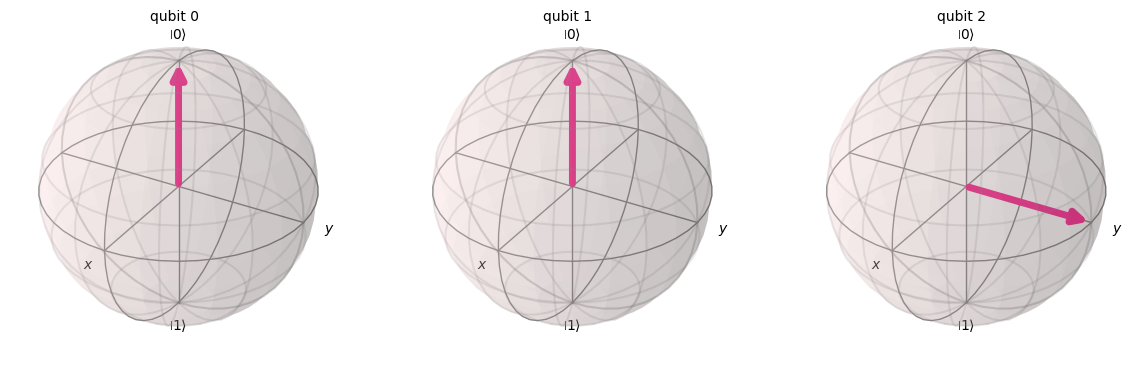

In [24]:
#simulate the circuit and plot the bloch vectors for each bit. 
job_teleporter = transpile(qc_teleporter, simulator)
resultant_circuit = simulator.run(job_teleporter).result()
output_state = resultant_circuit.get_statevector(qc_teleporter)
plot_bloch_multivector(output_state)

note that while qubits 0 and 1's bloch vectors change randomly between off and on due to the entanglement of the initial state and therefore the associated 50/50 probability of off or on when being measured, and that despite this randomness, the circuit corrects the state using the conditional z and x gates and transfers over the correct state every time. 

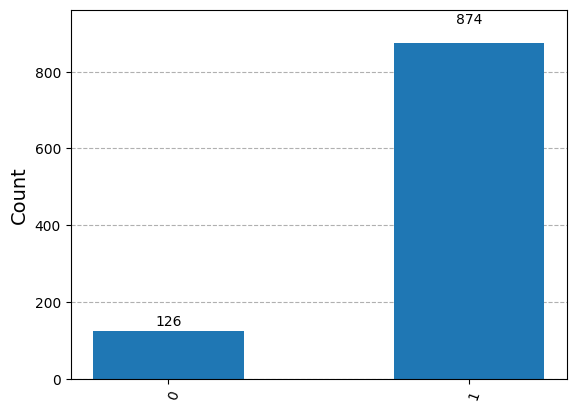

In [69]:
#example problem 2:
qc_problem2 = QuantumCircuit(1, 1)
qc_problem2.ry(3*pi / 4, 0)
qc_problem2.measure(0, 0)

job_problem2 = transpile(qc_problem2, simulator)
result_problem2 = simulator.run(job_problem2, shots = 1000).result()
counts_problem2 = result_problem2.get_counts(qc_problem2)
plot_histogram(counts_problem2)

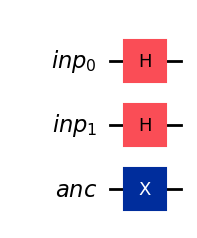

In [125]:
#example problem 3:
inp_reg = QuantumRegister(2, 'inp')
ancilla = QuantumRegister(1, 'anc')
qc_problem3 = QuantumCircuit(inp_reg, ancilla)
qc_problem3.h([0, 1])
qc_problem3.x(ancilla[0])
qc_problem3.draw(output = 'mpl')